# **Práctica 2. Regresión Logistica**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Cargar el archivo CSV
df = pd.read_csv('/content/drive/MyDrive/IA/SIS420/Loan_default_cut.csv')

# 1. Manejar valores faltantes
df = df.dropna()  # Puedes usar otras estrategias como fillna() según tus necesidades

# 2. Codificar variables categóricas
label_encoder = LabelEncoder()
categorical_features = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Guardar el DataFrame preprocesado en un nuevo archivo CSV
df.to_csv('Loan_default_preprocesado.csv', index=False)

In [4]:
# Cargar datos
data = np.loadtxt('Loan_default_preprocesado.csv', delimiter=',', skiprows=1)
X_train, y_train = data[0:16000, 0:16], data[0:16000, 16]
X_test, y_test = data[16000:20000, 0:16], data[16000:20000, 16]
X = X_train
y = y_train
print(X)
print(y)

[[5.60000e+01 8.59940e+04 5.05870e+04 ... 1.00000e+00 4.00000e+00
  1.00000e+00]
 [6.90000e+01 5.04320e+04 1.24440e+05 ... 0.00000e+00 4.00000e+00
  1.00000e+00]
 [4.60000e+01 8.42080e+04 1.29188e+05 ... 1.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [6.50000e+01 4.34740e+04 7.52590e+04 ... 0.00000e+00 4.00000e+00
  0.00000e+00]
 [4.00000e+01 5.02860e+04 1.01387e+05 ... 1.00000e+00 4.00000e+00
  1.00000e+00]
 [6.50000e+01 1.38543e+05 2.03001e+05 ... 1.00000e+00 0.00000e+00
  0.00000e+00]]
[0. 0. 1. ... 0. 0. 1.]


# Visualizar datos

In [5]:
def plotData(X, y):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
    # o para los negativos.

    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)

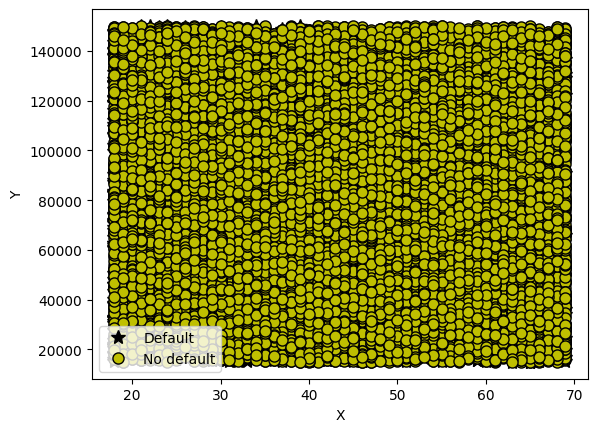

In [7]:
plotData(X_train, y_train)
# adiciona etiquetas para los ejes
pyplot.xlabel('X')
pyplot.ylabel('Y')
pyplot.legend(['Default', 'No default'])
pass

# Implementación. Función Sigmoidea

In [8]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [9]:
# Prueba la implementacion de la funcion sigmoid
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


In [10]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [11]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

# Función de Costo y Gradiente

In [12]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [13]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [14]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [15]:
print(X.shape[1])

17


theta calculado por el descenso por el gradiente: [-2.26946764 -0.57291768 -0.29581995  0.22284414 -0.14204645 -0.30351409
  0.08444898  0.44592903  0.00440487  0.06647254 -0.08411685  0.11182555
 -0.02603947 -0.02394573 -0.12289304 -0.00772756 -0.10243446]


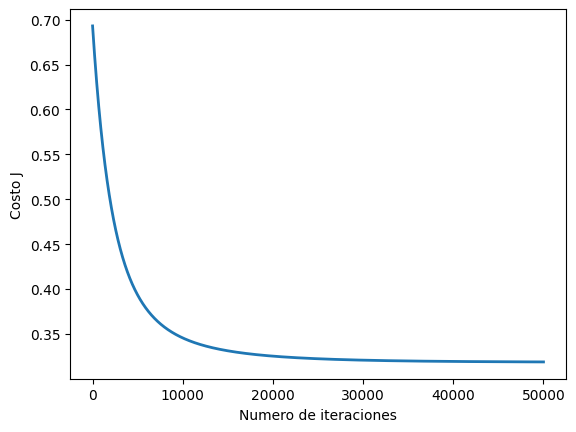

In [16]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 50000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X.shape[1])
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [17]:
print(X_test)
print(theta)

[[2.90000e+01 8.12680e+04 2.25600e+05 ... 0.00000e+00 1.00000e+00
  1.00000e+00]
 [3.10000e+01 1.33048e+05 4.27570e+04 ... 0.00000e+00 4.00000e+00
  1.00000e+00]
 [3.50000e+01 1.14886e+05 1.91052e+05 ... 0.00000e+00 4.00000e+00
  0.00000e+00]
 ...
 [6.40000e+01 9.05470e+04 4.55100e+04 ... 1.00000e+00 1.00000e+00
  0.00000e+00]
 [3.50000e+01 2.09720e+04 1.19385e+05 ... 1.00000e+00 3.00000e+00
  1.00000e+00]
 [6.10000e+01 1.43247e+05 3.91960e+04 ... 1.00000e+00 1.00000e+00
  0.00000e+00]]
[-2.26946764 -0.57291768 -0.29581995  0.22284414 -0.14204645 -0.30351409
  0.08444898  0.44592903  0.00440487  0.06647254 -0.08411685  0.11182555
 -0.02603947 -0.02394573 -0.12289304 -0.00772756 -0.10243446]


In [18]:
X_test, y_test = data[16000:, :16], data[16000:, 16]
print(X_test)

[[2.90000e+01 8.12680e+04 2.25600e+05 ... 0.00000e+00 1.00000e+00
  1.00000e+00]
 [3.10000e+01 1.33048e+05 4.27570e+04 ... 0.00000e+00 4.00000e+00
  1.00000e+00]
 [3.50000e+01 1.14886e+05 1.91052e+05 ... 0.00000e+00 4.00000e+00
  0.00000e+00]
 ...
 [6.60000e+01 1.20990e+05 7.65140e+04 ... 1.00000e+00 2.00000e+00
  1.00000e+00]
 [5.90000e+01 1.24161e+05 1.19242e+05 ... 1.00000e+00 3.00000e+00
  0.00000e+00]
 [4.00000e+01 5.34120e+04 5.09450e+04 ... 0.00000e+00 1.00000e+00
  0.00000e+00]]


In [19]:
# verificar si hace default (1) o no (0)
X_array = [1, 40,37925,104926,456,34,1,20.27,24,0.71,1,1,2,0,0,3,0]
aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto
print(aprueba)
print('La persona tiene una probabilidad de default de: {:.0f}'.format(aprueba))

1.0
La persona tiene una probabilidad de default de: 1


In [20]:
X_test_norm, mu, sigma = featureNormalize(X_test)
m, n = X_test_norm.shape
X_test_norm = np.concatenate([np.ones((m, 1)), X_test_norm], axis=1)
aprueba = sigmoid(np.dot(X_test_norm, theta))   # Se debe cambiar esto
print(aprueba)

[0.209862   0.1842216  0.15178989 ... 0.01546676 0.01941009 0.05731586]


In [35]:
# Tomar al menos 10 datos de X_test
num_datos_a_probar = 10
count=0
# Realizar la prueba para cada dato en X_test_subset
for i in range(num_datos_a_probar):
    random_indices = np.random.randint(0, X_test_norm.shape[0], size=1)[0]  # Modificado para obtener un array de índices aleatorios
    X_array = X_test_norm[random_indices]
    #X_array = np.insert(X_array, 0, 1)
    aprueba = sigmoid(np.dot(X_array, theta))
    if np.round(aprueba) == y_test[random_indices]:
        count += 1
    print(f'Dato {i + 1}: La persona tiene una probabilidad de default de: {np.round(aprueba)}, esperado: {y_test[random_indices]}')
print(f'Predicciones correctas: {count}/{num_datos_a_probar}')

Dato 1: La persona tiene una probabilidad de default de: 0.0, esperado: 0.0
Dato 2: La persona tiene una probabilidad de default de: 0.0, esperado: 0.0
Dato 3: La persona tiene una probabilidad de default de: 0.0, esperado: 0.0
Dato 4: La persona tiene una probabilidad de default de: 0.0, esperado: 0.0
Dato 5: La persona tiene una probabilidad de default de: 0.0, esperado: 0.0
Dato 6: La persona tiene una probabilidad de default de: 0.0, esperado: 0.0
Dato 7: La persona tiene una probabilidad de default de: 0.0, esperado: 0.0
Dato 8: La persona tiene una probabilidad de default de: 0.0, esperado: 0.0
Dato 9: La persona tiene una probabilidad de default de: 0.0, esperado: 0.0
Dato 10: La persona tiene una probabilidad de default de: 0.0, esperado: 1.0
Predicciones correctas: 9/10
